In [3]:
import torch
from torchvision.datasets import CelebA
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

In [4]:
test = np.load('face_images.npz')
face_images = test['face_images']

In [5]:
face_images = face_images.swapaxes(2,0)
face_images = face_images.swapaxes(1,2)

In [6]:
face_images.shape

(7049, 96, 96)

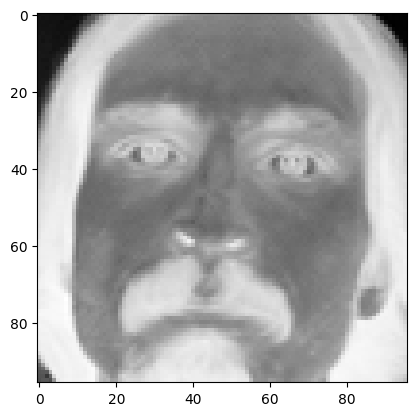

In [42]:
plt.imshow(face_images[0], cmap='Greys')

In [43]:
flattened = face_images[:100].reshape(100,-1)

In [44]:
flattened.shape

(100, 9216)

In [45]:

Cov_Matrix = flattened.T @ flattened

In [46]:

def calc_penalties(data, vectors, index):
   
    vec = vectors[:, index]
    penalties = np.zeros_like(np.dot(data, vectors[:, 0]))
    
    for i in range(index):
        result = np.dot(data, vectors[:, i])
        penalties += (np.dot(np.dot(data, vec), result) /
         np.dot(result, result)
        ) * result

    return penalties 


def eigengame(data, n_components, epochs=100, learning_rate=0.1):
 
    dim = data.shape[1]
    vectors = np.ones((dim, n_components))
    for t in range(n_components):
        print(f'Component {t}')
        for epoch in range(epochs):
            rewards = np.dot(data, vectors[:, t])
            penalties = calc_penalties(data, vectors, t)
            
            delta_v = 2*np.dot(data.T, rewards - penalties)
            vectors[:, t] = vectors[:, t] + learning_rate * delta_v
            vectors[:, t] = vectors[:, t] / np.linalg.norm(vectors[:, t])
            
    return vectors.T

In [47]:
eigdata = eigengame(flattened, 10, epochs=10)

Component 0
Component 1
Component 2
Component 3
Component 4
Component 5
Component 6
Component 7
Component 8
Component 9


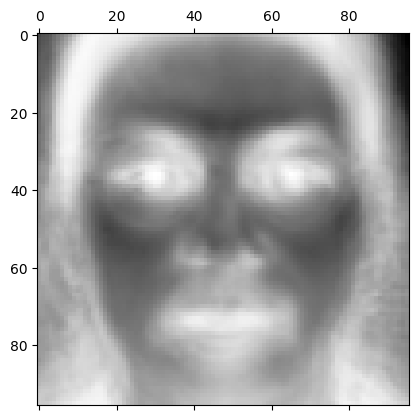

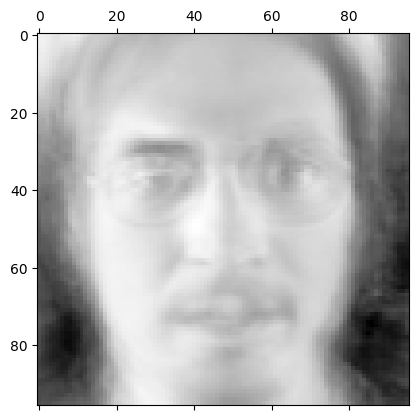

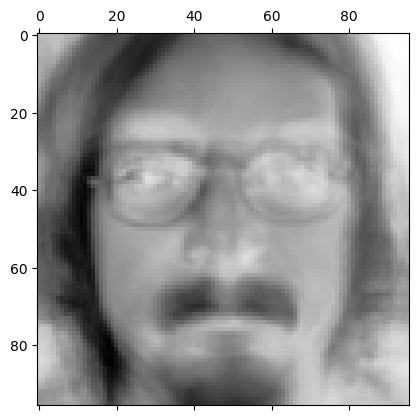

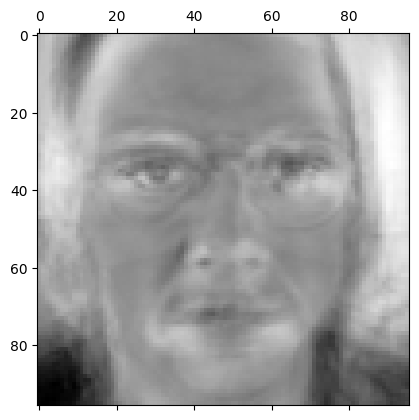

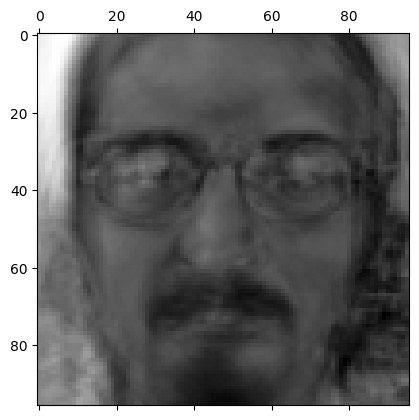

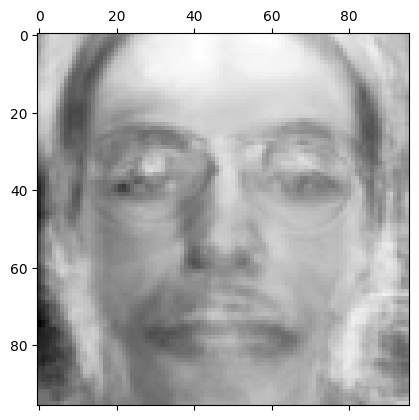

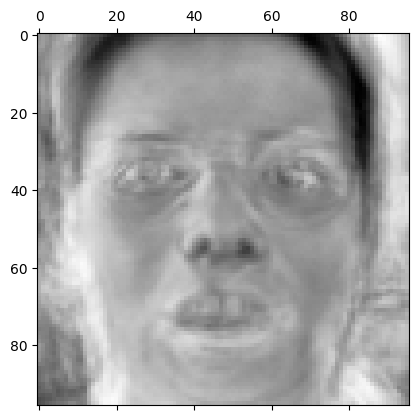

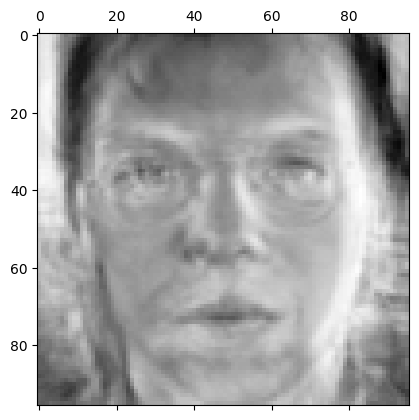

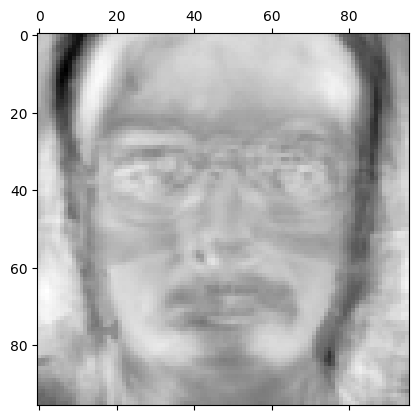

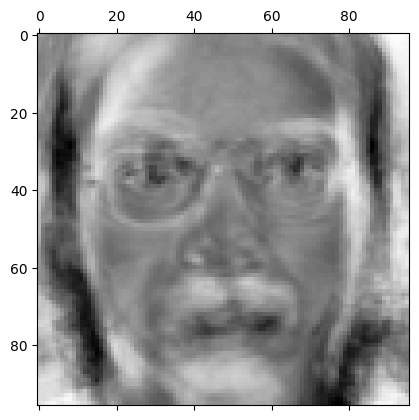

In [48]:
for i in range(10):
    plt.matshow(eigdata[i].reshape(96,96), cmap='Greys')
    plt.show()